# The example of section 3 
## You just need to run the entire notebook.

## Importing libraries : 

In [1]:
import os
import csv
from sklearn.metrics import auc, roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from FIF import *

# The example with different kind of anomaly:

### Constructing the dataset :

In [2]:
np.random.seed(42)
m =100
n =100
tps = np.linspace(0,1,m)
v = np.linspace(1,1.4,n)
X = np.zeros((n,m))
for i in range(n):
    X[i] = 30 * ((1-tps) ** v[i]) * tps ** v[i]

    
Z1 = np.zeros((m))
for j in range(m):
    if (tps[j]<0.2 or tps[j]>0.8):
        Z1[j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2 
    else:
        Z1[j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2 + np.random.normal(0,0.3,1)
Z1[0] = 0
Z1[m-1] = 0


Z2 = 30 * ((1-tps) ** 1.6) * tps ** 1.6


Z3 = np.zeros((m))
for j in range(m):
    Z3[j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2 + np.sin(2*np.pi*tps[j])
    
Z4 = np.zeros((m))
for j in range(m):
    Z4[j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2
    
for j in range(70,71):
    Z4[j] += 2
    
Z5 = np.zeros((m))
for j in range(m):
    Z5[j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2 + 0.5*np.sin(10*np.pi*tps[j])
    
X = np.concatenate((X,Z1.reshape(1,-1),Z2.reshape(1,-1),  
                     Z3.reshape(1,-1), Z4.reshape(1,-1), Z5.reshape(1,-1)), axis = 0)



### Applying FIF :

In [3]:
# Sobolev scalar product and Gaussian wavelets dictionary :

#pas mal avec psi=100 et alpha = 0.5 ou alpha=0.7
np.random.seed(42)
F3  = FIForest(X, D="gaussian_wavelets", time=tps, innerproduct="auto", alpha=0.5)
S3  = F3.compute_paths()

### Plotting the dataset :

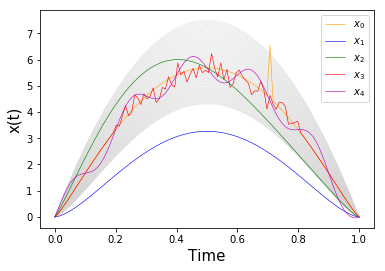

In [4]:
plt.figure(figsize=(6,4))
for i in range(100):
    plt.plot(tps, X[i], c='Lightgray', linewidth=0.3)
    
plt.plot(tps,Z4,c='orange', label='$x_0$', linewidth=0.6)

plt.plot(tps,Z2,c='b', label='$x_1$', linewidth=0.6)
plt.plot(tps,Z3,c='g', label='$x_2$', linewidth=0.6)
plt.plot(tps,Z1,c='r', label='$x_3$', linewidth=0.6)
plt.plot(tps,Z5,c='m', label='$x_4$', linewidth=0.6)

plt.legend()
plt.ylabel('x(t)',size='15')
plt.xlabel('Time',size=15)
plt.show()

### Plotting the sorted dataset :

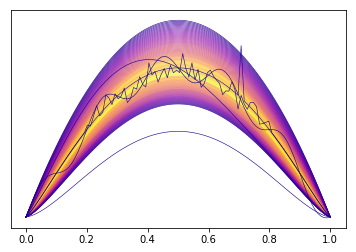

In [5]:
colors = [ matplotlib.cm.plasma_r(x)
            for x in np.linspace(0, 1, len(S3)) ]
plt.figure(figsize=(6,4))
for j in range(0,len(colors)):
    plt.plot(tps, X[np.argsort(S3)[j],:], '-', c=colors[j], zorder=1, linewidth = 0.6)


  
    
sm = plt.cm.ScalarMappable(cmap=matplotlib.cm.viridis_r,
 
                                   norm=plt.Normalize(vmin=0, vmax=1))
plt.yticks([]) 
sm._A = []
plt.show()

### Plotting the sorted score of the dataset :

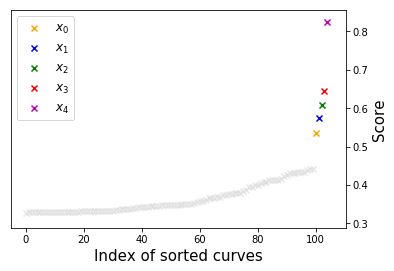

In [6]:
fig= plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
for i in range(len(S3)-5):
    ax.scatter(np.arange(len(S3))[i],np.sort(S3)[i], color='Lightgray', marker='x',alpha=0.5)

ax.scatter(100, np.sort(S3)[100], color='orange', marker='x', label='$x_0$')
ax.scatter(101, np.sort(S3)[101], c='b', marker='x', label='$x_1$')
ax.scatter(102, np.sort(S3)[102], c='g', marker='x',  label='$x_2$')
ax.scatter(103, np.sort(S3)[103], c='r', marker='x', label='$x_3$')
ax.scatter(104, np.sort(S3)[104], c='m', marker='x', label='$x_4$')

ax.set_xlabel('Index of sorted curves',size=15)
ax.yaxis.tick_right()

ax.yaxis.set_label_position("right")
ax.set_ylabel('Score',size=15)
ax.legend(fontsize='large')
#plt.savefig("anomaly_example_score.pdf")
plt.show()